In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df= pd.read_csv('IRIS.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

In [4]:
df.describe(include = 'all')

sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

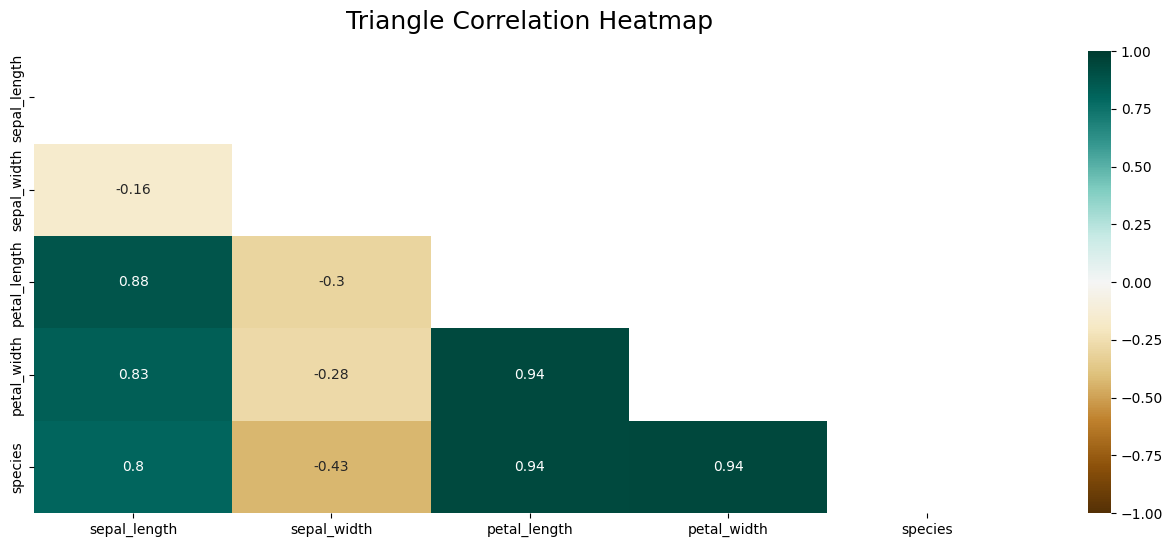

In [5]:
plt.figure (figsize = (16 , 6))

mask = np.triu(np.ones_like(df.corr(method = "spearman") , dtype = bool))
heatmap = sns.heatmap(df.corr(method = "spearman") , mask = mask , vmin = -1 , vmax = 1 ,
                      annot = True , cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap" , fontdict = {'fontsize': 18} , pad =16 )

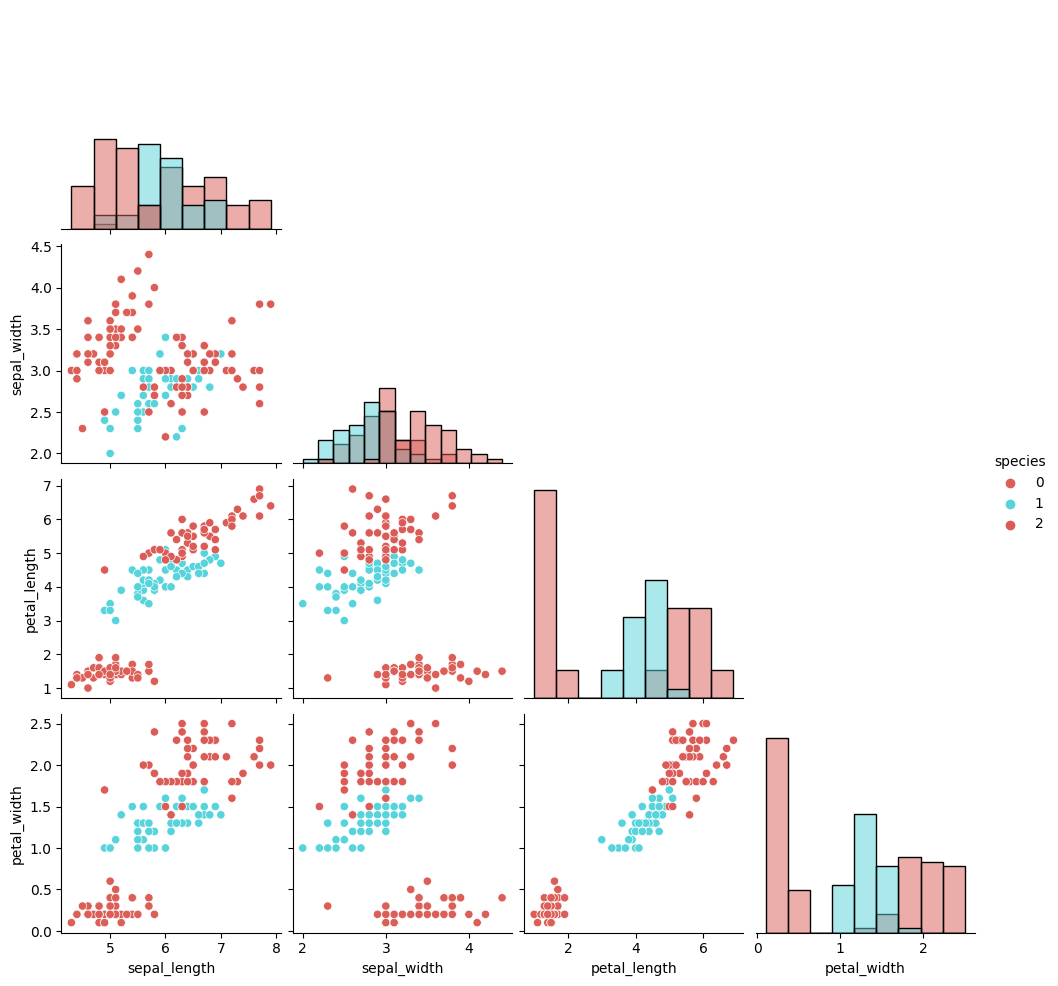

In [6]:
sns.pairplot(df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')

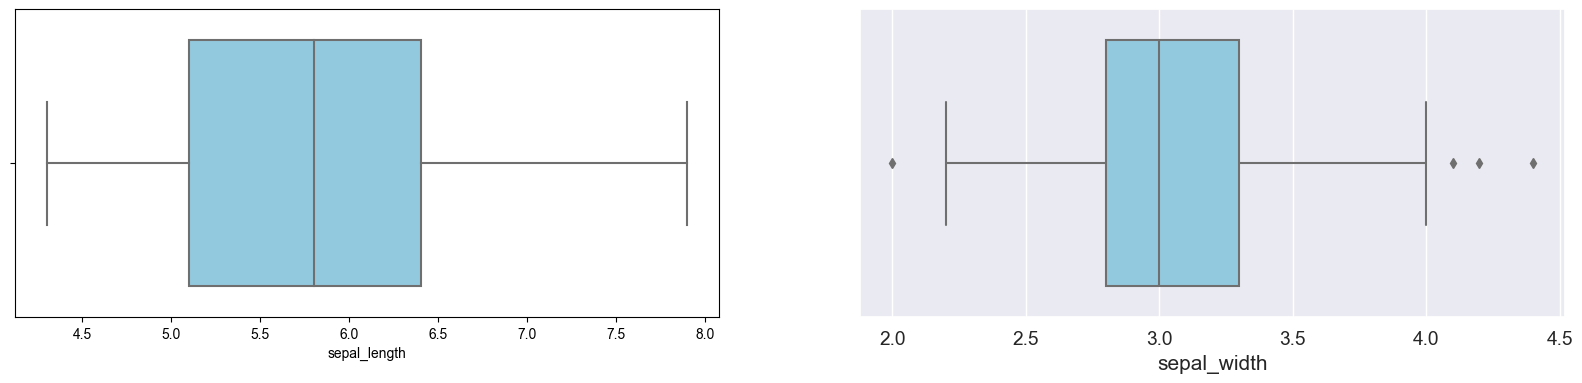

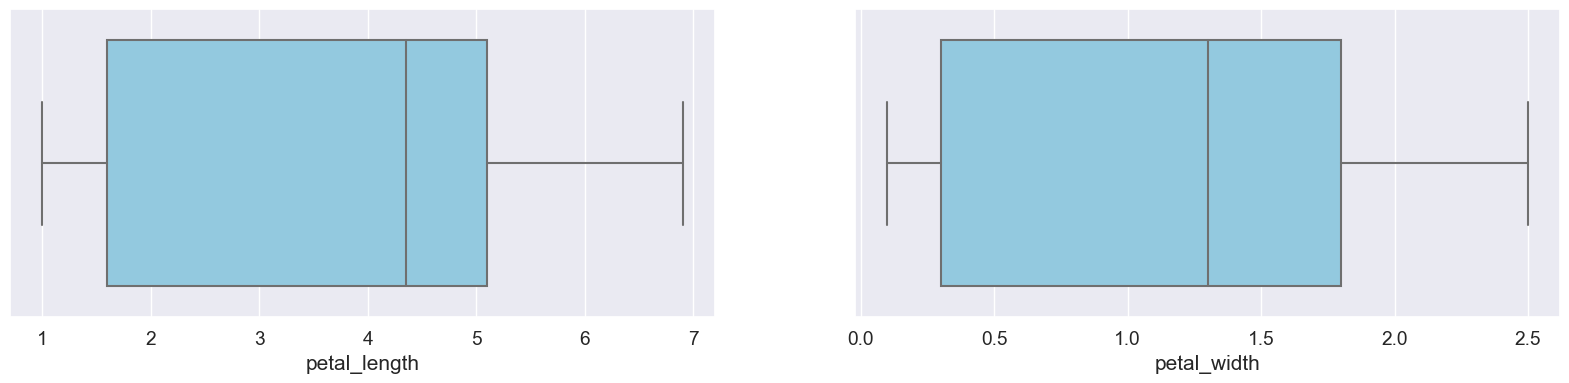

In [7]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

<AxesSubplot: xlabel='species', ylabel='count'>

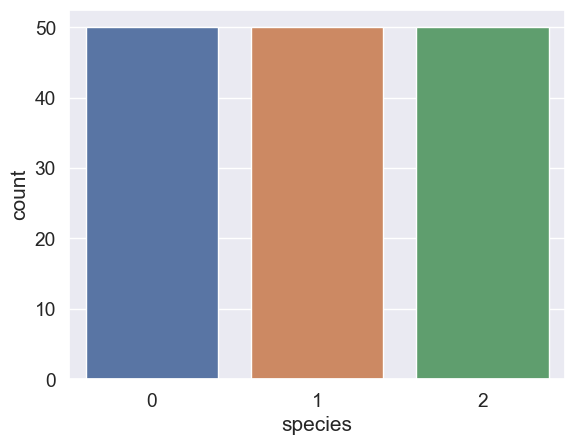

In [8]:
sns.countplot(x = df['species'] , data = df)

In [9]:
X = pd.DataFrame(df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y= df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25 , random_state = 0)

In [11]:
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
X_train = Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)

In [12]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [13]:
LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train, X_test, y_train, y_test)

Logistic Regression : 

 • Training Accuracy Score :  94.64
 • Cross Validation Score : 94.77
 • Testing Accuracy Score :94.74
 • Precision Score is : 94.74
 • Recall Score is : 94.74
 • F1-Score Score is : 94.74


In [14]:
NB = GaussianNB()
NB.fit(X_train , y_train.ravel())
y_pred_NB = NB.predict(X_test)
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

Naive Bayes : 

 • Training Accuracy Score :  94.64
 • Cross Validation Score : 93.79
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


In [16]:
SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

SVM : 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 96.44
 • Testing Accuracy Score :97.37
 • Precision Score is : 97.63
 • Recall Score is : 97.37
 • F1-Score Score is : 97.4


In [17]:
from sklearn.pipeline import Pipeline

In [19]:
pipe = Pipeline([('scaler', preprocessing.MinMaxScaler(feature_range = (0,1))), ('svc', SVC())])

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [22]:
import pickle 

In [23]:
with open('model.pkl','wb') as file:
    pickle.dump(pipe,file)